In [19]:
import torch
import torch.nn as nn
import random
import torchvision.transforms as transforms

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# Reading DATA

In [25]:
import torchvision.datasets as dsets
#MNIST 함수 사용, root : 어느 경로에 있나 train : True -> train set을 불러오겠다.
#transform : 어떤 변환 함수를 사용할 것인가? 
mnist_train = dsets.MNIST(root = "Mnist_data/", train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = "Mnist_data/", train = False, transform = transforms.ToTensor(), download = True)
 
batch_size = 100
#dataloader : 어떤 데이터를 로드할거냐, drop_last: 100으로 나눈 나머지 데이터들을 그냥 버리기
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


In [26]:
linear = torch.nn.Linear(784, 10, bias = True).to(device)
epochs = 15
batch_size = 100  # 총 데이터가 6만장이라면, 배치 600개, batchsize : 100개

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for epoch in range(epochs):  #15번동안 MNIST 전체 데이터를 가지고 학습
    avg_cost = 0
    total_batch = len(data_loader) 
    print(total_batch)
    c = 0
    for X,Y in data_loader: #batch size만큼의 data, label을 불러온다, 한 에폭이 될 때까지 계속 반복 (예상 : 600번)
        c+=1
        X = X.view(-1,28*28).to(device) # (batch_size, 676)으로 사이즈 변경
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost+= cost/total_batch
    #print(c)
    print("epoch:","%04d"%(epoch+1), "cost = ", "{:.9f}".format(avg_cost))

600
600
epoch: 0001 cost =  0.535468519
600
600
epoch: 0002 cost =  0.359274149
600
600
epoch: 0003 cost =  0.331187546
600
600
epoch: 0004 cost =  0.316578060
600
600
epoch: 0005 cost =  0.307158172
600
600
epoch: 0006 cost =  0.300180733
600
600
epoch: 0007 cost =  0.295130193
600
600
epoch: 0008 cost =  0.290851504
600
600
epoch: 0009 cost =  0.287417054
600
600
epoch: 0010 cost =  0.284379572
600
600
epoch: 0011 cost =  0.281825185
600
600
epoch: 0012 cost =  0.279800713
600
600
epoch: 0013 cost =  0.277809024
600
600
epoch: 0014 cost =  0.276154310
600
600
epoch: 0015 cost =  0.274440855


In [28]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction,1) == Y_test 
    #torch.argmax : 최대값의 index반환 -> 예측 Label / dim = 1 방향으로!
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8863000273704529


/Users/dlwlrma71/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/dlwlrma71/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Visualization

5


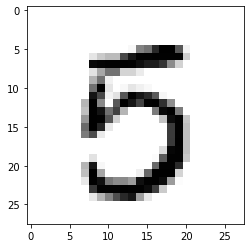

In [35]:
import matplotlib.pyplot as plt
import random
r = random.randint(0,len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

single_prediction = linear(X_single_data)
print(torch.argmax(single_prediction,1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap = "Greys", interpolation = "nearest")
plt.show()

# Multilayer Perceptron

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [10]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear1 = nn.Linear(2,2,bias = True)
linear2 = nn.Linear(2,1,bias = True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

criterion = nn.BCELoss().to(device)  # Loss Function : BCE
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis,Y) 
    
    cost.backward()
    optimizer.step()
    if step % 500 == 0:
        print(step, cost.item())
    

0 0.7126196026802063
500 0.6931912899017334
1000 0.6931604146957397
1500 0.693139910697937
2000 0.6930840015411377
2500 0.6895953416824341
3000 0.04585696756839752
3500 0.013895146548748016
4000 0.008052884601056576
4500 0.0056461151689291
5000 0.0043395026586949825
5500 0.003520903643220663
6000 0.002960497047752142
6500 0.002553110709413886
7000 0.0022437721490859985
7500 0.0020009279251098633
8000 0.0018052862724289298
8500 0.0016442961059510708
9000 0.0015095683047547936
9500 0.0013951826840639114
10000 0.001296805334277451
